# import libraries

In [1]:
import pickle
import numpy as np

# open the file

In [5]:
with open('train_qa_new.txt','rb')as fp:
    train_data=pickle.load(fp)

In [6]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

# length of the train_data

In [4]:
len(train_data)

1000

# open test data file

In [7]:
with open("test_qa_new.txt",'rb')as fp:
    test_data=pickle.load(fp)

In [8]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


# len of test data

In [10]:
len(test_data)

1000

# create empty set

In [11]:
vocab=set()

# combine the data

In [98]:
all_data=train_data+test_data
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


# looping

In [99]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

# adding 'yes' and 'no'

In [100]:
vocab.add('yes')
vocab.add('no')

In [101]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

# length of vocab

In [102]:
len(vocab)

37

# indexing start from 0 therefore, exact length of vocab

In [103]:
len_vocab=len(vocab)+1

# maximum story length

In [104]:
max_story_len=max([len(data[0]) for data in all_data])
max_story_len

86

# maximum question length

In [105]:
max_ques_len=max([len(data[1]) for data in all_data])
max_ques_len

6

# import from keras

In [106]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [107]:
tokenizer=Tokenizer(filters =[])

In [108]:
tokenizer.fit_on_texts(vocab)

# display the index number

In [109]:
tokenizer.word_index

{'the': 1,
 'bedroom': 2,
 'up': 3,
 'apple': 4,
 'got': 5,
 'moved': 6,
 'is': 7,
 'mary': 8,
 'no': 9,
 'went': 10,
 'left': 11,
 'kitchen': 12,
 '.': 13,
 'football': 14,
 'sandra': 15,
 'office': 16,
 'travelled': 17,
 '?': 18,
 'discarded': 19,
 'hallway': 20,
 'in': 21,
 'journeyed': 22,
 'took': 23,
 'dropped': 24,
 'garden': 25,
 'milk': 26,
 'grabbed': 27,
 'john': 28,
 'put': 29,
 'bathroom': 30,
 'picked': 31,
 'there': 32,
 'daniel': 33,
 'down': 34,
 'yes': 35,
 'back': 36,
 'to': 37}

In [110]:
train_story_text=[]
train_question_text=[]
# train_answer = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [111]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [112]:
train_story_seq

[[8, 5, 1, 26, 32, 13, 28, 6, 37, 1, 2, 13],
 [8,
  5,
  1,
  26,
  32,
  13,
  28,
  6,
  37,
  1,
  2,
  13,
  8,
  19,
  1,
  26,
  13,
  28,
  10,
  37,
  1,
  25,
  13],
 [8,
  5,
  1,
  26,
  32,
  13,
  28,
  6,
  37,
  1,
  2,
  13,
  8,
  19,
  1,
  26,
  13,
  28,
  10,
  37,
  1,
  25,
  13,
  33,
  6,
  37,
  1,
  2,
  13,
  33,
  10,
  37,
  1,
  25,
  13],
 [8,
  5,
  1,
  26,
  32,
  13,
  28,
  6,
  37,
  1,
  2,
  13,
  8,
  19,
  1,
  26,
  13,
  28,
  10,
  37,
  1,
  25,
  13,
  33,
  6,
  37,
  1,
  2,
  13,
  33,
  10,
  37,
  1,
  25,
  13,
  33,
  17,
  37,
  1,
  30,
  13,
  15,
  17,
  37,
  1,
  2,
  13],
 [8,
  5,
  1,
  26,
  32,
  13,
  28,
  6,
  37,
  1,
  2,
  13,
  8,
  19,
  1,
  26,
  13,
  28,
  10,
  37,
  1,
  25,
  13,
  33,
  6,
  37,
  1,
  2,
  13,
  33,
  10,
  37,
  1,
  25,
  13,
  33,
  17,
  37,
  1,
  30,
  13,
  15,
  17,
  37,
  1,
  2,
  13,
  8,
  23,
  1,
  14,
  32,
  13,
  15,
  27,
  1,
  26,
  32,
  13],
 [33, 10, 36, 37, 1, 12,

In [113]:
def vectorize_stories(data,word_index=tokenizer.word_index,
                     max_story_len=max_story_len,max_ques_len=max_ques_len):
    x=[]
    xq=[]
    y=[]
    
    for story,question,answer in data:
        x.append([word_index[word.lower()] for word in story])
        xq.append([word_index[word.lower()] for word in question])
        y1= np.zeros(len(word_index)+1)
        y1[word_index[answer]] =1
        y.append(y1)
        
    return (pad_sequences(x,maxlen=max_story_len),
           pad_sequences(xq, maxlen=max_ques_len),
           np.array(y))
        

In [114]:
inputs_train,queries_train,answer_train=vectorize_stories(train_data)

In [115]:
inputs_train

array([[ 0,  0,  0, ...,  1,  2, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       ...,
       [ 0,  0,  0, ...,  1,  4, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       [ 0,  0,  0, ...,  4, 32, 13]])

In [116]:
inputs_test,queries_test,answer_test=vectorize_stories(test_data)

In [117]:
inputs_test

array([[ 0,  0,  0, ...,  1,  2, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       ...,
       [ 0,  0,  0, ...,  1,  4, 13],
       [ 0,  0,  0, ...,  1, 25, 13],
       [ 0,  0,  0, ...,  4, 32, 13]])

In [118]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding #input
from keras.layers import Input,Activation,Dense, Permute, Dropout, add, dot,concatenate, LSTM

In [119]:
input_sequence= Input((max_story_len,))
question= Input((max_ques_len,))
input_sequence

<KerasTensor: shape=(None, 86) dtype=float32 (created by layer 'input_14')>

In [120]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim= len_vocab,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [121]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim= len_vocab,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [122]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim= len_vocab,output_dim=64, input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [123]:
input_encoded_m= input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [124]:
match= dot([input_encoded_m,question_encoded], axes =(2,2))
match= Activation('softmax')(match)

In [125]:
response= add([match,input_encoded_c])
response= Permute((2,1))(response)

In [126]:
answer= concatenate([response,question_encoded])

In [127]:
answer= LSTM(32)(answer)

In [128]:
answer= Dropout(0.5)(answer)
answer= Dense(len_vocab)(answer)
answer= Activation('softmax')(answer)

In [129]:
model=Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [130]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 86)]         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, None, 64)     2432        input_14[0][0]                   
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 6, 64)        2432        input_15[0][0]                   
____________________________________________________________________________________________

In [131]:
model_out=model.fit([inputs_train,queries_train],answer_train,
                   batch_size= 30, epochs=25,
                   validation_data=([inputs_test,queries_test],answer_test))

Epoch 1/25
34/34 [==============================] - 5s 37ms/step - loss: 2.4506 - accuracy: 0.4091 - val_loss: 0.9069 - val_accuracy: 0.4970
Epoch 2/25
34/34 [==============================] - 0s 9ms/step - loss: 1.0005 - accuracy: 0.5184 - val_loss: 0.7493 - val_accuracy: 0.5030
Epoch 3/25
34/34 [==============================] - 0s 10ms/step - loss: 0.9028 - accuracy: 0.4948 - val_loss: 0.7148 - val_accuracy: 0.5030
Epoch 4/25
34/34 [==============================] - 0s 9ms/step - loss: 0.8200 - accuracy: 0.5353 - val_loss: 0.7050 - val_accuracy: 0.5030
Epoch 5/25
34/34 [==============================] - 0s 9ms/step - loss: 0.7920 - accuracy: 0.4990 - val_loss: 0.7011 - val_accuracy: 0.5030
Epoch 6/25
34/34 [==============================] - 0s 9ms/step - loss: 0.7499 - accuracy: 0.5080 - val_loss: 0.6994 - val_accuracy: 0.5030
Epoch 7/25
34/34 [==============================] - 0s 11ms/step - loss: 0.7438 - accuracy: 0.5095 - val_loss: 0.6944 - val_accuracy: 0.5030
Epoch 8/25
34/34 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


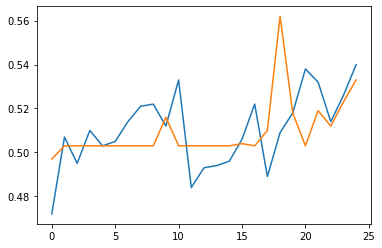

In [160]:
import matplotlib.pyplot as plt
print(model_out.history.keys())
plt.plot(model_out.history['accuracy'])
plt.plot(model_out.history['val_accuracy'])

# save

In [133]:
model.save('chatbot_model')

INFO:tensorflow:Assets written to: chatbot_model\assets


C:\Users\sayye\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
INFO:tensorflow:Assets written to: chatbot_model\assets


In [134]:
pred_results=model.predict(([inputs_test, queries_test]))

In [135]:
pred_results

array([[5.7442509e-07, 2.3825326e-07, 3.6566240e-07, ..., 5.3716719e-01,
        2.7257789e-07, 2.8911356e-07],
       [6.4104768e-07, 2.6900167e-07, 4.1853511e-07, ..., 5.3786516e-01,
        3.0570530e-07, 3.3036406e-07],
       [5.2528628e-07, 2.1949565e-07, 3.6399885e-07, ..., 5.7112306e-01,
        2.6781680e-07, 2.9103865e-07],
       ...,
       [1.0629190e-06, 4.4418545e-07, 6.8021552e-07, ..., 5.1513946e-01,
        4.7522667e-07, 5.4850739e-07],
       [1.1278167e-06, 5.0897160e-07, 8.4017574e-07, ..., 5.8490062e-01,
        6.1268059e-07, 6.7192201e-07],
       [8.8936656e-07, 4.1944969e-07, 6.4732853e-07, ..., 5.7819402e-01,
        4.9790788e-07, 5.2094924e-07]], dtype=float32)

In [139]:
story=' '.join(word for word in test_data[0][0])
story

'Mary got the milk there . John moved to the bedroom .'

In [141]:
querie=' '.join(word for word in test_data[0][1])
querie

'Is John in the kitchen ?'

In [143]:
answer=''.join(word for word in test_data[0][2])
answer

'no'

In [154]:
story=' '.join(word for word in test_data[22][0])
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there .'

In [155]:
querie=' '.join(word for word in test_data[22][1])
querie

'Is Daniel in the bathroom ?'

In [156]:
answer=''.join(word for word in test_data[22][2])
answer

'yes'

In [158]:
val_max=np.argmax(pred_results[22])

for key,val in tokenizer.word_index.items():
    if val==val_max:
        k= key
        
print('predicted answer is',{k})
print('probability of certainty:', pred_results[22][val_max])

predicted answer is {'yes'}
probability of certainty: 0.5432208
